In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [2]:
df=pd.read_csv('/content/weatherAUS.csv.zip')

In [3]:
df.shape

(142193, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','RISK_MM'],axis=1,inplace=True)

In [7]:
df.shape

(142193, 19)

In [8]:
df.duplicated().value_counts()

False    142193
dtype: int64

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [10]:
df['Date']=pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(['Date'],axis=1,inplace=True)

In [11]:
df.head().shape

(5, 21)

In [12]:
categorical_columns=[]
for i in df.columns:
  if df[i].dtype=='O':
    categorical_columns.append(i)

categorical_columns

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [13]:
df[categorical_columns].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [14]:
df['WindGustDir'].mode()

0    W
Name: WindGustDir, dtype: object

In [15]:
df['WindDir9am'].mode()

0    N
Name: WindDir9am, dtype: object

In [16]:
df['WindDir3pm'].mode()

0    SE
Name: WindDir3pm, dtype: object

In [17]:
df['RainToday'].mode()

0    No
Name: RainToday, dtype: object

In [18]:
df['WindGustDir']=df['WindGustDir'].fillna('W')

In [19]:
df['WindDir9am']=df['WindDir9am'].fillna('N')

In [20]:
df['WindDir3pm']=df['WindDir3pm'].fillna('SE')


In [21]:
df['RainToday']=df['RainToday'].fillna('NO')

In [22]:
df[categorical_columns].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [23]:
numarical_columns=[]
for i in df.columns:
  if df[i].dtype!='O':
    numarical_columns.append(i)

numarical_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [24]:
df[numarical_columns].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [25]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())

In [26]:
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())

In [27]:
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())

In [28]:
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

In [29]:
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

In [30]:
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [31]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [32]:
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
#df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [33]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,1,No,2008,12,1
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,1,No,2008,12,2
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,1,No,2008,12,3
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,1,No,2008,12,4
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,1,No,2008,12,5


In [34]:
X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [35]:
df_train = df.iloc[:99536]
df_test = df.iloc[99537:]

In [36]:
X_train = df_train.loc[:,['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'Day']]
y_train = df_train.loc[:,['RainTomorrow']]

X_test = df_test.loc[:,['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'Day']]
y_test = df_test.loc[:,['RainTomorrow']]

In [37]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,1,2008,12,1
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,1,2008,12,2
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,1,2008,12,3
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1,2008,12,4
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,1,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99531,22,10.6,16.9,0.0,8,31.0,12,8,7.0,13.0,83.0,49.0,1021.4,1020.4,12.3,16.4,1,2016,3,28
99532,22,11.0,19.5,0.0,10,35.0,13,10,7.0,24.0,88.0,46.0,1023.2,1021.4,12.2,17.7,1,2016,3,29
99533,22,11.8,19.6,0.0,15,33.0,14,15,7.0,20.0,66.0,53.0,1022.8,1021.0,14.4,18.9,1,2016,3,30
99534,22,11.7,22.9,0.0,14,41.0,6,14,15.0,28.0,100.0,47.0,1020.1,1017.3,13.7,22.1,1,2016,3,31


In [38]:
scaler1 = StandardScaler()


X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

#scaler2 = StandardScaler()
#y_train = scaler2.fit_transform(y_train)
#y_test = scaler2.transform(y_test)

In [39]:
X_train

array([[-1.48513021,  0.21739849,  0.03009007, ..., -1.85236036,
         1.63253605, -1.67288048],
       [-1.48513021, -0.72342402,  0.35081952, ..., -1.85236036,
         1.63253605, -1.55922169],
       [-1.48513021,  0.13899661,  0.43829119, ..., -1.85236036,
         1.63253605, -1.4455629 ],
       ...,
       [-0.05026901, -0.03348752, -0.4510041 , ...,  1.30124868,
        -0.99371084,  1.62322442],
       [-0.05026901, -0.04916789,  0.03009007, ...,  1.30124868,
        -0.99371084,  1.73688321],
       [-0.05026901, -0.22165202,  0.33624091, ...,  1.30124868,
        -0.70190563, -1.67288048]])

In [40]:
log_reg = LogisticRegression(solver = 'liblinear', random_state=0)
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [41]:
y_pred = log_reg.predict(X_test)
y_pred

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [42]:
log_reg.coef_

array([[-0.10210636,  0.33212759, -0.20200283,  0.12568327,  0.04474854,
         0.72122976, -0.0793736 ,  0.03020453, -0.05776806, -0.25721842,
         0.04799741,  1.23650516,  0.7350391 , -1.07221042, -0.21768553,
         0.16819193,  0.14401316, -0.0142227 ,  0.02570183, -0.017449  ]])

In [43]:
log_reg.intercept_

array([-1.65997227])

In [44]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='Yes')
recall = recall_score(y_test, y_pred,pos_label='Yes')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [45]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.8523302700675168
Precision: 0.7468479117415288
Recall: 0.43055082339579787
Confusion Matrix:
 [[32566  1285]
 [ 5014  3791]]
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.96      0.91     33851
         Yes       0.75      0.43      0.55      8805

    accuracy                           0.85     42656
   macro avg       0.81      0.70      0.73     42656
weighted avg       0.84      0.85      0.84     42656



In [46]:
log_reg.pred_prob=log_reg.predict_proba(X_test)[0:10]
log_reg.pred_prob

array([[0.97304561, 0.02695439],
       [0.96533162, 0.03466838],
       [0.41724751, 0.58275249],
       [0.81102043, 0.18897957],
       [0.90073164, 0.09926836],
       [0.78526588, 0.21473412],
       [0.5938723 , 0.4061277 ],
       [0.80837002, 0.19162998],
       [0.75516971, 0.24483029],
       [0.85002006, 0.14997994]])

In [47]:
log_reg100 = LogisticRegression(C=100, solver = 'liblinear', random_state=0)

In [48]:
log_reg100.fit(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, random_state=0, solver='liblinear')

In [49]:
y_pred = y_pred = log_reg100.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='Yes')
recall = recall_score(y_test, y_pred,pos_label='Yes')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [51]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.8602072393098275
Precision: 0.7381830372108615
Recall: 0.5001703577512777
Confusion Matrix:
 [[32289  1562]
 [ 4401  4404]]
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.95      0.92     33851
         Yes       0.74      0.50      0.60      8805

    accuracy                           0.86     42656
   macro avg       0.81      0.73      0.76     42656
weighted avg       0.85      0.86      0.85     42656



In [52]:
log_reg1 = LogisticRegression(C=1, solver = 'liblinear', random_state=0)
log_reg1.fit(X_test,y_test)
y_pred = y_pred = log_reg1.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='Yes')
recall = recall_score(y_test, y_pred,pos_label='Yes')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [54]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.8602072393098275
Precision: 0.7382629107981221
Recall: 0.5000567859170926
Confusion Matrix:
 [[32290  1561]
 [ 4402  4403]]
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.95      0.92     33851
         Yes       0.74      0.50      0.60      8805

    accuracy                           0.86     42656
   macro avg       0.81      0.73      0.76     42656
weighted avg       0.85      0.86      0.85     42656



In [55]:
y_pred_prob = log_reg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.97304561, 0.02695439],
       [0.96533162, 0.03466838],
       [0.41724751, 0.58275249],
       [0.81102043, 0.18897957],
       [0.90073164, 0.09926836],
       [0.78526588, 0.21473412],
       [0.5938723 , 0.4061277 ],
       [0.80837002, 0.19162998],
       [0.75516971, 0.24483029],
       [0.85002006, 0.14997994]])

In [56]:

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.973046,0.026954
1,0.965332,0.034668
2,0.417248,0.582752
3,0.811020,0.188980
4,0.900732,0.099268
5,0.785266,0.214734
6,0.593872,0.406128
7,0.808370,0.191630
8,0.755170,0.244830
9,0.850020,0.149980


In [57]:
y_pred1 = log_reg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

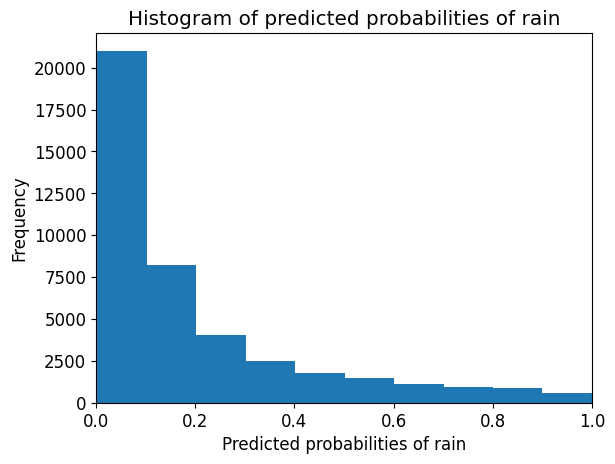

In [58]:
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of rain')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

In [60]:
from sklearn.preprocessing import binarize

for i in range(1,5):

    cm1=0

    y_pred1 = log_reg.predict_proba(X_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold=i/10)

    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')

    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[19918 13933]
 [  830  7975]] 

 with 27893 correct predictions,  

 13933 Type I errors( False Positives),  

 830 Type II errors( False Negatives),  

 Accuracy score:  0.653905663915979 

 Sensitivity:  0.9057353776263487 

 Specificity:  0.5884021151516942 



With 0.2 threshold the Confusion Matrix is  

 [[27156  6695]
 [ 1985  6820]] 

 with 33976 correct predictions,  

 6695 Type I errors( False Positives),  

 1985 Type II errors( False Negatives),  

 Accuracy score:  0.7965116279069767 

 Sensitivity:  0.7745599091425327 

 Specificity:  0.8022215001033943 



With 0.3 threshold the Confusion Matrix is  

 [[30143  3708]
 [ 3120  5685]] 

 with 35828 correct predictions,  

 3708 Type I errors( False Positives),  

 3120 Type II errors( False Negatives),  

 Accuracy score:  0.8399287321830458 

 Sensitivity:  0.645655877342419 

 Specificity:  0.890461138518803 



With 0.4 threshold the Confusion Matrix is  

 [[31677  2174]

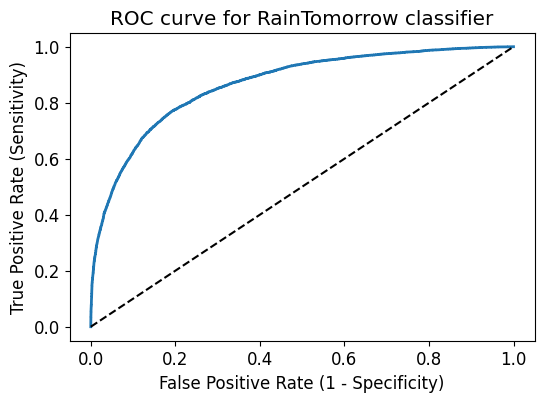

In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [62]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC :',ROC_AUC)

ROC AUC : 0.8662817148155919


In [63]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC :',Cross_validated_ROC_AUC)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross validated ROC AUC : 0.8372561306039807


In [64]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:',scores)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validation scores: [0.83534258 0.81855629 0.81132265 0.83930276 0.83764505]


In [65]:

print('Average cross-validation score:',scores.mean())

Average cross-validation score: 0.8284338640420369


In [66]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = log_reg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [67]:
print('GridSearch CV best score : \n\n',grid_search.best_score_)

print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 

 0.8284941448501051
Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [68]:
print('GridSearch CV score on test set:',grid_search.score(X_test, y_test))

GridSearch CV score on test set: 0.8523537134283571


##Results and conclusion


In [69]:
#The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

#Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

#The model shows no signs of overfitting.

#Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

#Increasing the threshold level results in increased accuracy.

#ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

#Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

#In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.

#Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

#Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.